In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') # 경고창 무시

In [2]:
income = pd.read_csv('../csv-data/income.csv')
income

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
income.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
income.drop(columns=['CustomerID'], inplace=True) # unrelated column: CustomerID
income.head(5)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


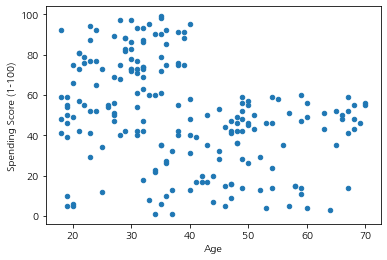

In [6]:
income.plot(kind="scatter", x="Age", y="Spending Score (1-100)")

In [7]:
# income correlation
income_corr = income.corr()
income_corr

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [8]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cols

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

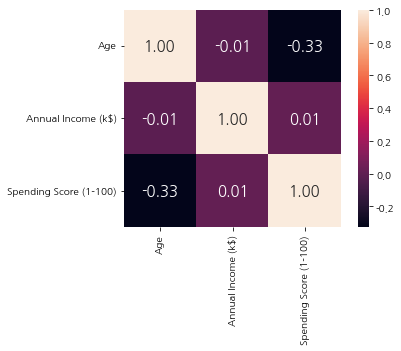

In [9]:
# heatmap
sns.heatmap(income_corr.values, # data = income_corr.values
            cbar = True,
            annot= True,
            square=True, 
            fmt = '.2f', # 소수점 2번째까지
            xticklabels=cols, # xlabel
            yticklabels=cols, # ylabel
            annot_kws={"size": 15} # heatmap value font size
           )
# plt.gcf().set_size_inches(10, 6) # heatmap size

# Age와 Spending Score(1~100)은 낮은 음의 상관관계에 있다
# Annual Income (K$)과 Age는 아주 낮은 음의 상관관계에 있다

In [10]:
income_genre = income['Genre'].value_counts()
income_genre

Female    112
Male       88
Name: Genre, dtype: int64

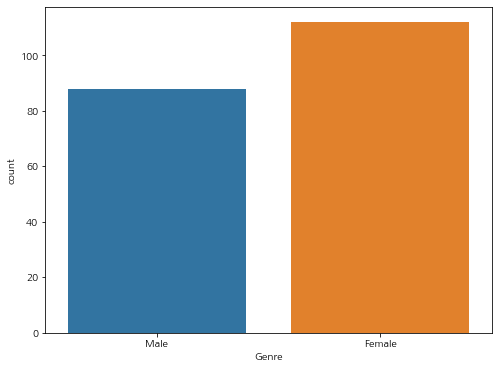

In [11]:
plt.figure(figsize=(8,6))
sns.countplot('Genre', data=income)
plt.show()
# 집계 데이터에서 남자보다 여자가 소비가 높은 것으로 분석되었다.

In [12]:
# if Male --> 1 , female --> 2
def male_or_female(x):
    if x == 'Male':
        return 1
    else:
        return 2

In [13]:
income['Genre'] = income['Genre'].apply(male_or_female)
income['Genre'][:3]

0    1
1    1
2    2
Name: Genre, dtype: int64

In [14]:
income

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40
...,...,...,...,...
195,2,35,120,79
196,2,45,126,28
197,1,32,126,74
198,1,32,137,18


In [15]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
ml_income = income[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
ml_income

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40
...,...,...,...,...
195,2,35,120,79
196,2,45,126,28
197,1,32,126,74
198,1,32,137,18


In [18]:
# Spending Score (1~100) group divide
def income_group(x):
    if x > 50:
        return 1
    else:
        return 2

In [19]:
income['Spending Score (1-100)'] = income['Spending Score (1-100)'].apply(income_group)
income['Spending Score (1-100)'][:3]

0    2
1    1
2    2
Name: Spending Score (1-100), dtype: int64

In [20]:
# exam setting
exam = ml_income[['Genre', 'Age', 'Annual Income (k$)']]
exam

,Genre,Age,Annual Income (k$)
0,1,19,15
1,1,21,15
2,2,20,16
3,2,23,16
4,2,31,17
...,...,...,...
195,2,35,120
196,2,45,126
197,1,32,126
198,1,32,137


In [21]:
# target setting
target = income['Spending Score (1-100)']
type(target)

pandas.core.series.Series

In [22]:
train_exam, test_exam, train_target, test_target = train_test_split(exam,  # 문제
                                                                    target, # 정답
                                                                    test_size=0.2, # 검증비율 20%, 훈련비율 80%
                                                                    random_state=80 # 시드값
                                                                    )

In [23]:
train_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 42 to 175
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Genre               160 non-null    int64
 1   Age                 160 non-null    int64
 2   Annual Income (k$)  160 non-null    int64
dtypes: int64(3)
memory usage: 5.0 KB


In [24]:
train_target.count()

160

In [25]:
test_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 109 to 150
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Genre               40 non-null     int64
 1   Age                 40 non-null     int64
 2   Annual Income (k$)  40 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [26]:
test_target.count()

40

In [27]:
train_exam.reset_index(inplace=True)
del train_exam['index']
train_exam.head()

,Genre,Age,Annual Income (k$)
0,1,48,39
1,2,36,103
2,1,59,54
3,2,42,34
4,1,19,15


In [28]:
train_target = train_target.reset_index()
del train_target['index']
train_target.head()

,Spending Score (1-100)
0,2
1,1
2,2
3,2
4,2


In [29]:
test_exam.reset_index(inplace=True)
del test_exam['index']
test_exam.head()

,Genre,Age,Annual Income (k$)
0,1,66,63
1,2,29,79
2,2,28,76
3,2,36,87
4,1,19,46


In [30]:
test_target = test_target.reset_index()
del test_target['index']
test_target.head()

,Spending Score (1-100)
0,2
1,1
2,2
3,2
4,1


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
tree_clf = DecisionTreeClassifier(
                max_depth=3, random_state=80
)

In [33]:
tree_clf.fit(train_exam, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=80,
            splitter='best')

In [34]:
tree_clf.score(train_exam, train_target) # score : 75%

0.75

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
com_target = tree_clf.predict(test_exam)
com_target[:5]

array([2, 1, 1, 1, 1], dtype=int64)

In [37]:
test_target = test_target['Spending Score (1-100)']

In [38]:
test_target = test_target.values
test_target[:5]

array([2, 1, 2, 2, 1], dtype=int64)

In [39]:
accuracy_score(test_target, com_target) # score : 70%

0.7

In [40]:
train_exam.columns

Index(['Genre', 'Age', 'Annual Income (k$)'], dtype='object')

In [41]:
Brown = [1, 10, 8]

In [42]:
result1 = tree_clf.predict_proba([Brown])
result1

array([[0.83333333, 0.16666667]])

In [43]:
def func(r):
    if r[0][0] > r[0][1]:
            print('소비지수가 높습니다')
            print('소비지수', int(r[0][0]*100))
    else:
            print('소비지수가 낮습니다')
            print('소비지수', int(r[0][1]*100))

In [44]:
func(result1) # Brown : 0.83333333

소비지수가 높습니다
소비지수 83


In [45]:
Merry = [2, 25, 37]

In [46]:
result2 = tree_clf.predict_proba([Merry])
result2

array([[0.78723404, 0.21276596]])

In [47]:
func(result2) # Merry : 0.78723404

소비지수가 높습니다
소비지수 78
